# 필요한 라이브러리 설치

In [163]:
# 필요한 라이브러리 설치
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sklearn
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
import missingno as msno
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

# 파일 불러오기 - 6class

In [ ]:
# 파일 받아오기
# 6class

simple_imputer = pd.read_csv('jdf.csv')
KNN_dataframes = pd.read_csv('idf.csv')
MICE_dataframe = pd.read_csv('kdf.csv')

# 파일 불러오기 - 3class

In [ ]:
'''
# 파일 받아오기
# 3class

simple_imputer = pd.read_csv('just_df_3class')
KNN_dataframes = pd.read_csv('iterative_df_3class')
MICE_dataframe = pd.read_csv('knn_df_3class')
'''

# x, y 나누기

In [201]:
Mx = MICE_df.drop(labels=['bankruptcy'], axis=1)
My = MICE_df['bankruptcy'].to_frame()

In [202]:
Mx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.221040,0.999999,0.714341,7.960245e-07,0.732816,0.000004,0.000243,0.000003,0.004237,0.000025
1,0.732122,0.141459,0.998805,0.001911,0.733131,0.567150,0.295056,0.089361,0.000438,0.286385,...,0.154413,0.999999,0.714392,7.734314e-07,0.732812,0.000002,0.000155,0.000004,0.003262,0.000207
2,0.732234,0.141840,0.998340,0.001528,0.733127,0.567150,0.295135,0.089010,0.000338,0.286260,...,0.155188,0.999999,0.715292,6.949238e-07,0.734365,0.000002,0.000187,0.000005,0.002608,0.000018
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.157922,0.999999,0.713764,8.573256e-07,0.732812,0.000002,0.000171,0.000003,0.004052,0.000019
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.154583,0.999999,0.714538,7.843941e-07,0.733090,0.000003,0.000204,0.000005,0.002753,0.000027


In [203]:
Kx = KNN_df.drop(labels=['bankruptcy'], axis=1)
Ky = KNN_df['bankruptcy'].to_frame()

In [204]:
Kx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.221040,0.999999,0.714341,7.960245e-07,0.732816,0.000004,0.000243,0.000003,0.004237,0.000025
1,0.732122,0.141459,0.998805,0.001911,0.733131,0.567150,0.295056,0.089361,0.000438,0.286385,...,0.154413,0.999999,0.714392,7.734314e-07,0.732812,0.000002,0.000155,0.000004,0.003262,0.000207
2,0.732234,0.141840,0.998340,0.001528,0.733127,0.567150,0.295135,0.089010,0.000338,0.286260,...,0.155188,0.999999,0.715292,6.949238e-07,0.734365,0.000002,0.000187,0.000005,0.002608,0.000018
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.157922,0.999999,0.713764,8.573256e-07,0.732812,0.000002,0.000171,0.000003,0.004052,0.000019
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.154583,0.999999,0.714538,7.843941e-07,0.733090,0.000003,0.000204,0.000005,0.002753,0.000027


In [205]:
Sx = simple_df.drop(labels=['bankruptcy'], axis=1)
Sy = simple_df['bankruptcy'].to_frame()

In [206]:
Sx.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr54,attr55,attr56,attr57,attr58,attr59,attr61,attr62,attr63,attr64
0,0.732097,0.141224,0.998633,0.002011,0.733136,0.567704,0.295043,0.089571,0.000294,0.286390,...,0.000688,0.221040,0.999999,0.714341,7.960245e-07,0.732816,0.000243,0.000003,0.004237,0.000025
3,0.731758,0.141084,0.998774,0.002449,0.733141,0.567364,0.294798,0.089907,0.000273,0.286435,...,0.000689,0.157922,0.999999,0.713764,8.573256e-07,0.732812,0.000171,0.000003,0.004052,0.000019
4,0.732059,0.141679,0.998255,0.001382,0.733125,0.567417,0.294946,0.089131,0.000298,0.286313,...,0.000688,0.154583,0.999999,0.714538,7.843941e-07,0.733090,0.000204,0.000005,0.002753,0.000027
8,0.731552,0.141716,0.997857,0.001107,0.733117,0.567150,0.294677,0.089101,0.000344,0.286301,...,0.000681,0.153970,0.999999,0.713498,7.631905e-07,0.733574,0.000201,0.000005,0.003006,0.000009
11,0.731449,0.140702,0.998007,0.002039,0.733118,0.567029,0.294617,0.093551,0.000234,0.286618,...,0.000682,0.154233,0.999999,0.713371,9.981900e-07,0.732812,0.000638,0.000003,0.004564,0.000002


# Oversampling 진행

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

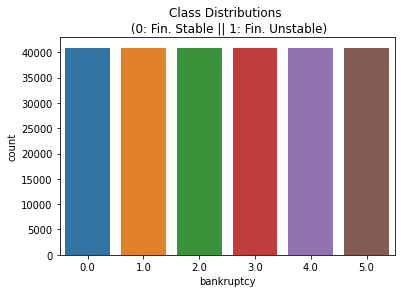

In [207]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Mdf, My = smote.fit_resample(Mx, My)

sns.countplot(x=My['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

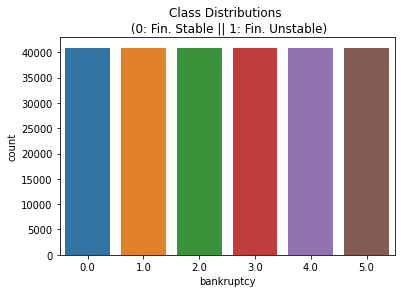

In [208]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Kdf, Ky = smote.fit_resample(Kx, Ky)

sns.countplot(x=Ky['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

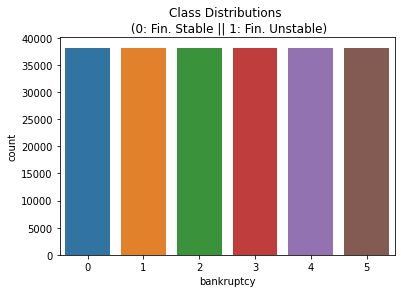

In [209]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Sdf, Sy = smote.fit_resample(Sx, Sy)

sns.countplot(x=Sy['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

# Train, Test 셋 나누기

In [210]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Mx_train, Mx_test, My_train, My_test = train_test_split(Mdf, My,test_size=0.3,random_state=2022)

In [211]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Kx_train, Kx_test, Ky_train, Ky_test = train_test_split(Kdf, Ky,test_size=0.3,random_state=2022)

In [212]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Sx_train, Sx_test, Sy_train, Sy_test = train_test_split(Sdf, Sy,test_size=0.3,random_state=2022)

# 모델 구축 ( 모델 이름 )

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
Mforest = RandomForestClassifier(n_estimators=100,max_depth=15, random_state=256)
Mforest.fit(Mx_train, My_train)

RandomForestClassifier(max_depth=15, random_state=256)

In [215]:
Kforest = RandomForestClassifier(n_estimators=100,max_depth=15, random_state=256)
Kforest.fit(Kx_train, Ky_train)

RandomForestClassifier(max_depth=15, random_state=256)

In [216]:
Sforest = RandomForestClassifier(n_estimators=100,max_depth=15, random_state=256)
Sforest.fit(Sx_train, Sy_train)

RandomForestClassifier(max_depth=15, random_state=256)

# 모델 예측

In [218]:
My_pred=Mforest.predict(Mx_test)

In [219]:
Ky_pred=Kforest.predict(Kx_test)

In [220]:
Sy_pred=Sforest.predict(Sx_test)

# 예측 정확도 확인

In [224]:
print("훈련 세트 정확도: {:.3f}".format(Mforest.score(Mx_train, My_train)))
print("테스트 세트 정확도: {:.3f}".format(Mforest.score(Mx_test, My_test)))

훈련 세트 정확도: 0.963
테스트 세트 정확도: 0.956


In [225]:
print("훈련 세트 정확도: {:.3f}".format(Kforest.score(Kx_train, Ky_train)))
print("테스트 세트 정확도: {:.3f}".format(Kforest.score(Kx_test, Ky_test)))

훈련 세트 정확도: 0.950
테스트 세트 정확도: 0.939


In [226]:
print("훈련 세트 정확도: {:.3f}".format(Sforest.score(Sx_train, Sy_train)))
print("테스트 세트 정확도: {:.3f}".format(Sforest.score(Sx_test, Sy_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.938


# 성능 지표 확인 ( + Confusion Matrix )

In [227]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(MX_train, My_train), '\n')
#print("Test_Accuracy : ", model.score(MX_test, My_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(My_test, My_pred)
recall = mt.recall_score(My_test, My_pred,average='micro')
precision = mt.precision_score(My_test, My_pred,average='micro')
f1_score = mt.f1_score(My_test, My_pred,average='micro')
matrix = mt.confusion_matrix(My_test, My_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.96 

Recall:  0.96 

Precision:  0.96 

F1_score:  0.96 

Confusion Matrix: 
 [[ 9173   220  1051  1028   665   292]
 [    0 12278     0     0     0     0]
 [    2     0 12332     0     0     0]
 [    3     0     0 12274     0     0]
 [    3     0     0     0 12005     0]
 [    2     0     0     0     0 12312]]


In [228]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(KX_train, Ky_train), '\n')
#print("Test_Accuracy : ", model.score(KX_test, Ky_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Ky_test, Ky_pred)
recall = mt.recall_score(Ky_test, Ky_pred,average='micro')
precision = mt.precision_score(Ky_test, Ky_pred,average='micro')
f1_score = mt.f1_score(Ky_test, Ky_pred,average='micro')
matrix = mt.confusion_matrix(Ky_test, Ky_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.94 

Recall:  0.94 

Precision:  0.94 

F1_score:  0.94 

Confusion Matrix: 
 [[ 7944   715  1153  1156   997   464]
 [    0 12278     0     0     0     0]
 [    4     0 12330     0     0     0]
 [    8     0     0 12269     0     0]
 [    7     0     0     0 12001     0]
 [    1     0     0     0     0 12313]]


In [229]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
#print("Train_Accuracy : ", model.score(SX_train, Sy_train), '\n')
#print("Test_Accuracy : ", model.score(SX_test, Sy_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Sy_test, Sy_pred)
recall = mt.recall_score(Sy_test, Sy_pred,average='micro')
precision = mt.precision_score(Sy_test, Sy_pred,average='micro')
f1_score = mt.f1_score(Sy_test, Sy_pred,average='micro')
matrix = mt.confusion_matrix(Sy_test, Sy_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.94 

Recall:  0.94 

Precision:  0.94 

F1_score:  0.94 

Confusion Matrix: 
 [[ 7299   660  1187  1076   916   423]
 [    0 11429     0     0     0     0]
 [    0     0 11543     0     0     0]
 [    4     0     0 11385     0     0]
 [    3     0     0     0 11436     0]
 [    1     0     0     0     0 11332]]
